In [29]:
# Importações
import pandas as pd
import matplotlib.pyplot as plt

# Processo básico

**1. Identificação e conhecimento da fonte primária:**

* A fonte primária de dados abordada neste relatório refere-se às informações sobre a precipitação total mensal. Esses dados são coletados nas estações localizadas nas proximidades das bacias do Rio das Velhas.

**2. b. Propor uma investigação ou uma hipótese a ser verificada nos dados.**

* Considerando a importância crítica da água nas bacias do Rio das Velhas e a influência direta da precipitação nas condições hidrológicas, propõe-se uma investigação para analisar a relação entre as precipitações e as vazões nessa região.

**3. Escolher uma variável meteorológica, entre as disponíveis**

* Precipitação total mensal

**4. d. Selecionar um grupo de pelo menos 10 estações próximas entre si, ou contidas em uma mesma região delimitada**

* Estações: CONTAGEM, BELO HORIZONTE (PAMPULHA), DIAMANTINA, CURVELO, PIRAPORA, SETE LAGOAS, BELO HORIZONTE - CERCADINHO

**5. Coletar, organizar, filtrar os dados da variável escolhida nas estações selecionadas para um período de tempo de cinco anos contínuos, ou alternados.**

* Periodo selecionado: 2018 - 2022

In [30]:
def reader_one(file_path):
    header_start = 0
    with open(file_path, 'r') as file:
        for i, line in enumerate(file):
            if 'Data Medicao;PRECIPITACAO TOTAL, MENSAL (AUT)(mm);' in line:
                header_start = i
                break
    
    df = pd.read_csv(file_path, delimiter=';', skiprows=header_start, usecols=['Data Medicao', 'PRECIPITACAO TOTAL, MENSAL (AUT)(mm)'])
    df = df.rename(columns={'PRECIPITACAO TOTAL, MENSAL (AUT)(mm)': 'valorMedida'})
    df = df.rename(columns={'Data Medicao': 'DataMedicao'})
    return df

def reader_two(file_path):    
    df = pd.read_csv(file_path)    
    df = df[['data', 'valorMedida']]
    df['data'] = pd.to_datetime(df['data'] + '-01')  # Adiciona '-01' para garantir o primeiro dia do mês
    df['data'] = df['data'] + pd.offsets.MonthEnd(0)  # Converte para o último dia do mês
    df = df.rename(columns={'data': 'DataMedicao'})

    return df

def filter_dates(station_data):
    for cidade, data in station_data.items():
        station_data[cidade]['DataMedicao'] = pd.to_datetime(station_data[cidade]['DataMedicao'], errors='coerce', format='%Y-%m-%d') 
        station_data[cidade] = station_data[cidade][station_data[cidade]['DataMedicao'].dt.year.between(2018, 2022)]
        if station_data[cidade].loc[:, 'valorMedida'].dtype != float:
            station_data[cidade].loc[:, 'valorMedida'] = ( station_data[cidade]['valorMedida'].str.replace(',', '.').astype(float))
    
    return station_data
    

In [31]:
data_paths = {0:'dados/dados_A501_M_2002-11-03_2008-06-24.csv',
              1: 'dados/dados_A521_M_2006-10-09_2022-12-31.csv',              
              2: 'dados/dados_A537_M_2007-06-04_2022-12-31.csv',
              3: 'dados/dados_A538_M_2006-12-17_2022-12-31.csv',
              4: 'dados/dados_A545_M_2007-07-03_2022-12-31.csv',
              5: 'dados/dados_A569_M_2016-06-09_2022-12-31.csv',
              6: 'dados/dados_F501_M_2013-12-26_2022-12-31.csv',
              7: 'dados/jaboticatubas-centro.csv',
              8: 'dados/Rio-Acima-Morgans.csv',
              9: 'dados/Santa Luzia-Palmital.csv',
              10: 'dados/vespasiano-santaonies.csv'}
            
station = ['CONTAGEM',
            'BH-PAMPULHA',
            'DIAMANTINA',
            'CURVELO',
            'PIRAPORA',
            'SETE-LAGOAS',
            'BH-CERCADINHO',
            'JABOTICATUBAS',
            'RIO-ACIMA',
            'SANTA-LUZIA',
            'VESPASIANO']


station_data = {}
for key, path in data_paths.items():
    if key < 7:
        station_data[station[key]] = reader_one(path)
    else:
        station_data[station[key]] = reader_two(path)


station_data = filter_dates(station_data)

**6. Importar os dados para tabelas geográficas, em que a localização da estação possa ser usada**


In [32]:
# Temos que importar a localização geografica das estações de algum lugar

**7. Realizar análises na direção apontada pela investigação ou hipótese propostas**


In [33]:
# Qual seria a nossa investigação?

**8. Demonstrar os resultados da análise por meio de visualizações**

In [34]:
# Vou plotar a evolução da chuva só de marola

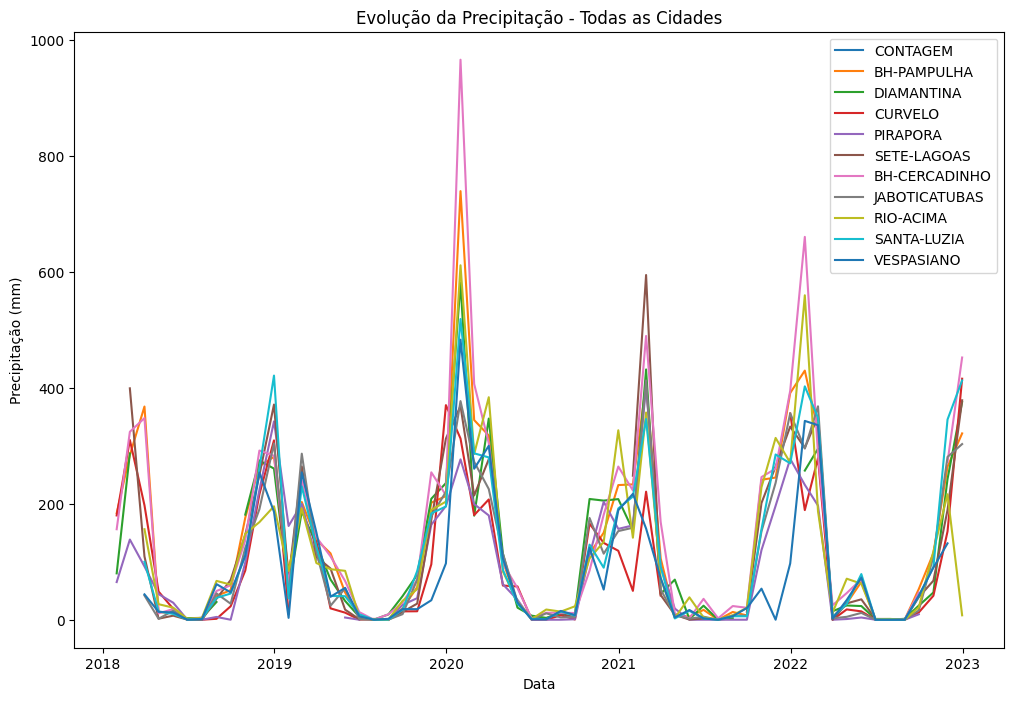

In [35]:
def plot_stations(station_data):    
    plt.figure(figsize=(12, 8))
    for cidade, df in station_data.items():                
        plt.plot(df['DataMedicao'], df['valorMedida'], label=cidade)
    
    plt.title('Evolução da Precipitação - Todas as Cidades')
    plt.xlabel('Data')
    plt.ylabel('Precipitação (mm)')
    plt.legend()
    plt.show()


plot_stations(station_data)